In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly as py
import plotly.graph_objs as go

import pickle

## Prepare the dataset

In [2]:
# read in the iris data which is included with sklearn
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# It's a 'bunch', kind of like a dictionary.
print(type(iris))
print(iris.keys())
print(iris.target_names)
print(iris.feature_names)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# what are the data and target?
print(iris.data[:5])
print(iris.target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [5]:
# convert these values into a dataframe, calculate area, and display.
df = pd.DataFrame(iris.data, columns=['sl', 'sw', 'pl', 'pw'])
df['species']=iris.target
df['sepal_area']=df.apply(lambda x: x['sl']*x['sw'], axis=1)
df['petal_area']=df.apply(lambda x: x['pl']*x['pw'], axis=1)
df.to_pickle('resources/full_iris.pkl')
df.head()

sl   sw   pl   pw  species  sepal_area  petal_area
0  5.1  3.5  1.4  0.2        0       17.85        0.28
1  4.9  3.0  1.4  0.2        0       14.70        0.28
2  4.7  3.2  1.3  0.2        0       15.04        0.26
3  4.6  3.1  1.5  0.2        0       14.26        0.30
4  5.0  3.6  1.4  0.2        0       18.00        0.28

In [6]:
# How many do we have of each species?
df['species'].value_counts().sort_index()

0    50
1    50
2    50
Name: species, dtype: int64

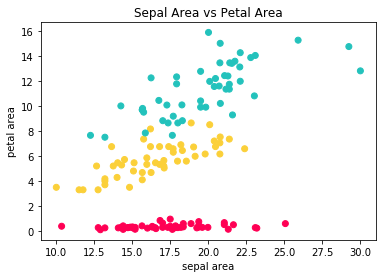

In [7]:
# plot the flowers' sepal area vs sepal area using matplotlib
colors = np.array(['#FF0054','#FBD039','#23C2BC'])
plt.figure()
plt.scatter(df['sepal_area'], df['petal_area'], c=colors[df['species']])
plt.xlabel('sepal area')
plt.ylabel('petal area')
plt.title('Sepal Area vs Petal Area')
plt.show()

## K-nearest neighbors (only 2 predictors)

In [8]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.DataFrame(iris.data, columns=['sl', 'sw', 'pl', 'pw'])
df['species']=iris.target

# establish the predictors and the target
X = df.drop(['species', 'sl', 'sw'], axis=1)
y = df['species']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X , y, 
                         test_size=0.3, random_state=52 )
# instantiate the estimator
mymodel = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
# fit with training data
mymodel.fit(X_train, y_train)
# predict on the testing data
y_preds = mymodel.predict(X_test)
# evaluate the accuracy score
print(metrics.accuracy_score(y_test, y_preds))
# evaluate other scores
print(metrics.confusion_matrix(y_test, y_preds))

0.9555555555555556
[[11  0  0]
 [ 0 15  2]
 [ 0  0 17]]


In [9]:
counter=10
print(len(X_test.iloc[counter]))
print(X_test.iloc[counter].values)
print(y_test.iloc[counter])

2
[5.7 2.1]
2


In [10]:
mymodel.predict([X_train.iloc[counter]])

array([1])

In [11]:
mymodel.predict([X_train.iloc[counter].values])[0]

1

In [12]:
print(type(X_test.iloc[counter].values))
print(type([X_test.iloc[counter].values]))

<class 'numpy.ndarray'>
<class 'list'>


#### New observation

In [13]:
# Create a  fake new data point
new_observation0=[[4,1]]
print(new_observation0[0][0])

4


In [14]:
# predict for our new observations.
prediction=mymodel.predict(new_observation0)
print(prediction)

[1]


In [15]:
# what are the species names associated with those predictions?
print(iris.target_names[1])

versicolor


In [16]:
# What's the distance and the ID numbers of the 5 nearest neighbors?
print(mymodel.kneighbors(new_observation0)) 
print('distances:', mymodel.kneighbors(new_observation0)[0][0]) 
print('indices:', mymodel.kneighbors(new_observation0)[1][0]) 

(array([[0.1       , 0.2       , 0.2236068 , 0.28284271, 0.3       ]]), array([[45, 25, 80, 75, 33]]))
distances: [0.1        0.2        0.2236068  0.28284271 0.3       ]
indices: [45 25 80 75 33]


In [17]:
neighbors=list(mymodel.kneighbors(new_observation0)[1][0])
print(neighbors)

[45, 25, 80, 75, 33]


## Visualize with Plotly

In [18]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [19]:
# Add species back in, then reset the index.
train = X_train.copy()
train['species']=y_train.copy()
train.reset_index(drop=True, inplace=True)
train.head()

pl   pw  species
0  1.5  0.4        0
1  1.7  0.3        0
2  4.1  1.3        1
3  4.2  1.3        1
4  1.4  0.2        0

In [20]:
# create a dataset with only the nearest neighbors
df_neighbors=train.iloc[neighbors, :]
df_neighbors

pl   pw  species
45  4.1  1.0        1
25  4.0  1.2        1
80  3.9  1.2        1
75  4.2  1.2        1
33  3.7  1.0        1

In [21]:
# Display those neighbors in a scatterplot using plotly dash

brights = ['red', 'blue', 'yellow', 'white'] # https://www.canva.com/learn/100-color-combinations/

trace1 = go.Scatter(
    x = train['pl'],
    y = train['pw'],
    mode = 'markers',
    marker=dict(
        color=train['species'],
        colorscale=brights[:3],)
)
trace0 = go.Scatter(
    x = df_neighbors['pl'],
    y = df_neighbors['pw'],
    mode = 'markers',
    marker=dict(
        size=12,
        color=brights[3],
        line=dict(
            color='darkblue',
            width=1.5),
    )
)
trace2 = go.Scatter(
    x = [new_observation0[0][0]],
    y = [new_observation0[0][1]],
    mode = 'markers',
    marker=dict(
        size=12,
        color=prediction,
        colorscale=brights[:3],
        symbol = 'pentagon',
        line=dict(
            color='darkblue',
            width=1.5),
    )
)

data=[trace0, trace1, trace2]

layout = go.Layout(
    title = 'K-Nearest Neighbors', # Graph title
    xaxis = dict(title = 'Petal Length'), # x-axis label
    yaxis = dict(title = 'Petal Width'), # y-axis label
    hovermode ='closest' # handles multiple points landing on the same vertical
)
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(tick0=3, dtick=1)
fig.update_yaxes(tick0=3, dtick=1)
fig.update_layout(
    showlegend=False,
#     width = 800,
#     height = 800,
    yaxis = dict(
      scaleanchor = "x",
      scaleratio = 1,
    )
)


iplot(fig)


In [22]:
# Pickle the final model for use in the plotly dash app.
file = open('resources/final_model.pkl', 'wb')
pickle.dump(mymodel, file)
file.close()

In [23]:
# Save X-train for visualization purposes
train.to_pickle('resources/train.pkl')